In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

FigureWidth = 3.375
# Set global parameters
params = {
          'lines.linewidth': 3,
          'axes.labelsize': int(9),
          'legend.fontsize': int(6.5),
          'xtick.labelsize': int(9),
          'ytick.labelsize': int(9),
          'text.usetex': True,
          'font.family': 'serif'}
plt.rcParams.update(params)
plt.rcParams['text.latex.preamble'] = r"\usepackage{amsmath}"

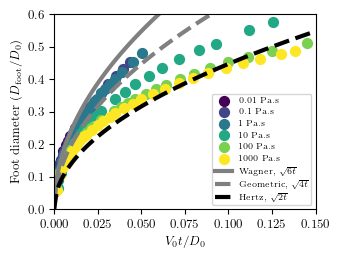

In [22]:
# Load data from files
file_paths = {
    '0.01 Pa.s': '10CSt.csv',
    '0.1 Pa.s': '100CSt.csv',
    '1 Pa.s': '1KCSt.csv',
    '10 Pa.s': '10KCSt.csv',
    '100 Pa.s': '100KCSt.csv',
    '1000 Pa.s': '1MCSt.csv',
}

# Dictionary to store dataframes
dataframes = {}

# Load data and show first few rows to inspect structure
for name, path in file_paths.items():
    df = pd.read_csv(path)
    dataframes[name] = df
    # print(f"Data from {name}:")
    # print(df.head(), "\n")  # Display the first few rows of each dataframe

# Check for column names to identify which columns to plot
column_names = {name: df.columns for name, df in dataframes.items()}
column_names

# Prepare colormap
import matplotlib
cmap = matplotlib.colormaps.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(dataframes)))

fig, ax = plt.subplots(figsize=(FigureWidth, FigureWidth * 0.75))
for (name, df), color in zip(dataframes.items(), colors):
    ax.scatter(df['t']/2, df['rc'], label=name, color=color, marker='o', s=50)  # s is the size of the marker

t = np.linspace(0, 0.15, 100)
y = np.sqrt(6*t)
ax.plot(t, y, label=r'Wagner, $\sqrt{6t}$', color='gray', linestyle='-')

t = np.linspace(0, 0.15, 100)
y = np.sqrt(4*t)
ax.plot(t, y, label=r'Geometric, $\sqrt{4t}$', color='gray', linestyle='--')

t = np.linspace(0, 0.15, 100)
y = np.sqrt(2*t)
ax.plot(t, y, label=r'Hertz, $\sqrt{2t}$', color='black', linestyle='--')


# Set labels and legend
ax.set_xlabel(r'$V_0t/D_0$')
ax.set_ylabel(r'Foot diameter ($D_{\text{foot}}/D_0$)')
ax.legend()
ax.set_xlim(0, 0.15)
ax.set_ylim(0, 0.6)
plt.savefig('foot.pdf', bbox_inches='tight')
plt.show()